In [1]:
import time
from DUT import DUT
import matplotlib.pyplot as plt
import numpy as np
import json
import sys

In [2]:
my_dut = DUT(20, True, 3.2)

my_dut.defected_meas

array([40,  2])

In [3]:
meastime, nmeas, nport, meas, ports, expyield = my_dut.info()
print("DUT: meas. time= ", meastime, " | measurements= ", nmeas, " | ports= ", nport, " | expected yield = ", expyield)

DUT: meas. time=  128.43814099999997  | measurements=  45  | ports=  12  | expected yield =  3.2


In [4]:
error_count = 0
X = []
Y = []
t=0

data= {}
data['component']=[]

meas_fails = []

for x in range(20000):
    my_dut.new_dut()
    dut={}
    dut['dut_id'] = x
    dut['measurements']=[]

    if x % 500 == 0:
        my_dut.calibrate()

    for i in range(0, nmeas):
        t, result, dist = my_dut.gen_meas_idx(i)
        measurement = {}
        measurement['m_id'] = i
        measurement['m_time'] = meas[i].meas_time
        measurement['m_result'] = dist
        dut['measurements'].append(measurement)
        
        if dist > 1.0: meas_fails.append(i)
            
#         if result == False:
#             break

    t, res, dist = my_dut.get_result()
    dut['dut_result'] = res

    data['component'].append(dut)

    X.append(t)
    Y.append(dist)
    if not res:
        error_count += 1

Calibration at  0.1  took  532.1566359999999  seconds.
Calibration at  64801.327136000895  took  532.1566359999999  seconds.
Calibration at  129602.55427200679  took  532.1566359999999  seconds.
Calibration at  194403.78140801992  took  532.1566359999999  seconds.
Calibration at  259205.0085440331  took  532.1566359999999  seconds.
Calibration at  324006.2356799901  took  532.1566359999999  seconds.
Calibration at  388807.4628159451  took  532.1566359999999  seconds.
Calibration at  453608.6899519001  took  532.1566359999999  seconds.
Calibration at  518409.9170878551  took  532.1566359999999  seconds.
Calibration at  583211.1442238368  took  532.1566359999999  seconds.
Calibration at  648012.371359821  took  532.1566359999999  seconds.
Calibration at  712813.598495805  took  532.1566359999999  seconds.
Calibration at  777614.8256317892  took  532.1566359999999  seconds.
Calibration at  842416.0527677733  took  532.1566359999999  seconds.
Calibration at  907217.2799037574  took  532.15

Total:  2592049.0854409384 s  20000  (  966  |  905  |  966  ) ==>  0.9517


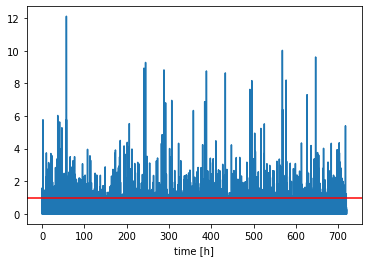

In [5]:
error_dut, error_meas = my_dut.get_errordutcount()
print("Total: ",t, "s ", x+1, " ( ", error_count, " | ", error_dut, " | ", error_meas, " ) ==> ", (x+1-error_count)/(x+1) )

# write json log
# outfile = open('result.json', 'w')
# json.dump(data, outfile, indent=2)

# plot results
timeAxis = [x / 3600. for x in X]
plt.xlabel('time [h]')
plt.plot(timeAxis,Y)
plt.axhline(y=1., xmin=0, xmax=1, color='r')
plt.show()

In [6]:
# data